# Citizenship card Tampering Detection

The purpose of this project is to detect tampering of Citizenship card using Computer Vision. this project will help to detect if the Citizenship card provided is the original or not

## Steps
1. Get images from the user
2. Check for size and format of the image
3. Change shape and size of the image according to the original image
4. Convert the image to Grayscale
5. Find similarity index of the images
6. Finding the threshold of the image
7. Finding contour and grab those contour using 'IMUTILS'
8. Draw a bounding rectangle using these contours
9. Plot difference, threshold original and tampered imaging
10. Compare all the images and check the similarity score to decide Tampering


### Importing the necessary packages

In [18]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import os

Certainly! These packages in Python are used for various image processing and computer vision tasks. Let's go through each of them and explain their uses:

1. **skimage.metrics.structural_similarity:**
   This function is a part of the `scikit-image` library and is used to compute the Structural Similarity Index (SSIM) between two images. SSIM is a metric that quantifies the similarity between two images, taking into account luminance, contrast, and structure. It's often used to compare how similar two images are, which is useful in tasks like image quality assessment, image compression, and image registration.

2. **imutils:**
   `imutils` is a library that provides a set of convenience functions to simplify common image processing tasks. It's not a part of the standard library, but it's widely used for tasks like resizing, rotating, and displaying images. It wraps around OpenCV and makes certain operations more user-friendly.

3. **cv2 (OpenCV):**
   OpenCV (Open Source Computer Vision Library) is a powerful library for computer vision and image processing tasks. It provides functions and classes to perform a wide range of operations, such as image manipulation, object detection, feature extraction, and more. OpenCV is widely used in various fields, including robotics, surveillance, medical imaging, and more.

4. **PIL (Pillow):**
   The Python Imaging Library (PIL), known as Pillow, is used for opening, manipulating, and saving various image file formats. It provides tools for basic image processing tasks like cropping, resizing, enhancing, and applying filters. Pillow is often used when you need simple image processing without the extensive capabilities of OpenCV.

5. **requests:**
   The `requests` library is used for making HTTP requests in Python. While not directly related to image processing, it could be used to download images from the internet, send image data to a server, or retrieve image data from APIs.


# Code

In [19]:
import os

# Specify the full path of the directory you want to create.
nuevo_directorio = "C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting"
nuevo_directorio2 = "C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting\\image"
# Verify if the Directory already exists before creating it
if not os.path.exists(nuevo_directorio):
    os.mkdir(nuevo_directorio)
    print("Directory created successfully.")
else:
    print("The directory already exists.")


if not os.path.exists(nuevo_directorio2):
    os.mkdir(nuevo_directorio2)
    print("Directory created successfully.")
else:
    print("The directory already exists.")



The directory already exists.
The directory already exists.


## Image Acquisition 

In [20]:
#original_image = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
original_image = Image.open(requests.get('https://i.ibb.co/GP8Nh4k/cedula-frontal-fake.png', stream=True).raw)
#tampered_image = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)
tampered_image = Image.open(requests.get('https://i.ibb.co/zszKfLD/cedula-frontal.jpg',stream=True).raw)

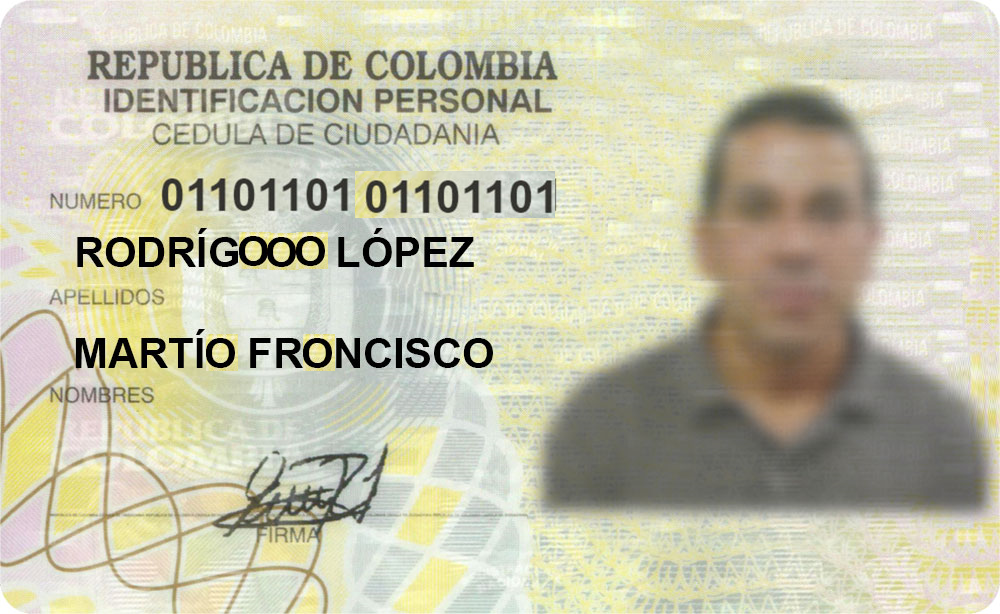

In [21]:
original_image

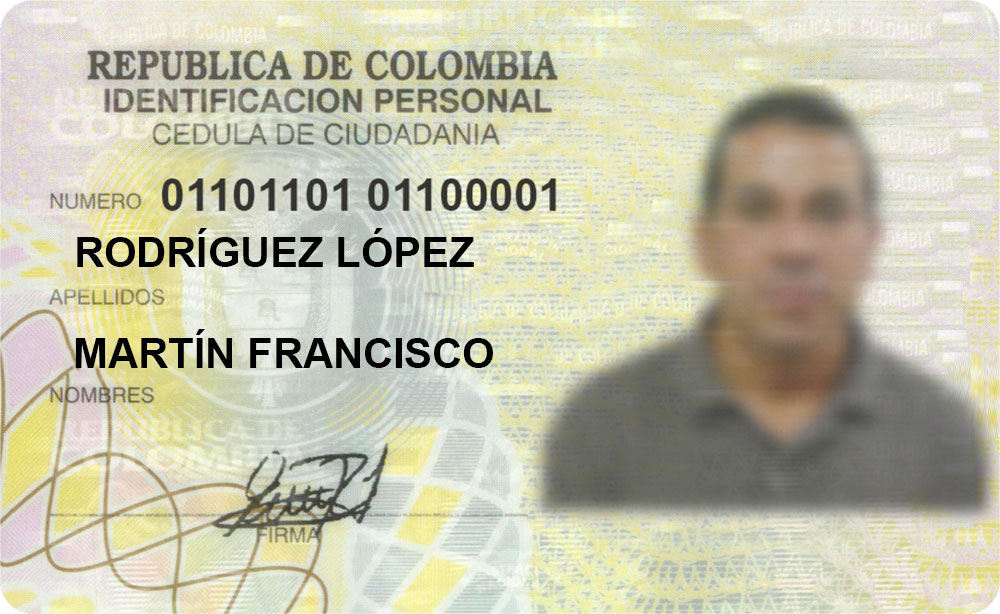

In [22]:
tampered_image

### loading original and tampered user provided images


In [23]:
# file format of the source file
print("Original image format: ",original_image.format)
print("Original image format: ",tampered_image.format)

# image size in pixels. given as a 2-tuple (width, height).
print("Original Size : ",original_image.size)
print("Tampered size : ",tampered_image.size)



Original image format:  PNG
Original image format:  JPEG
Original Size :  (1000, 614)
Tampered size :  (1000, 614)


### Resizing

In [24]:
original = original_image.resize((250,160))
print(original.size)

original.save('C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting\\image\\original.png')

tampered = tampered_image.resize((250,160))
print(tampered.size)
tampered.save('C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting\\image\\tampered.png')

(250, 160)
(250, 160)


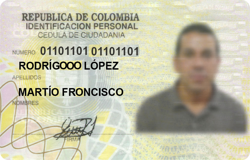

In [25]:
original

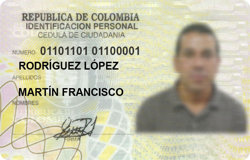

In [26]:
tampered

### loading images with cv2

In [27]:
original = cv2.imread("C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting\\image\\original.png")
tampered = cv2.imread("C:\\Users\\anfes\\My Drive\\Projects\\Data_Projects\\Fake_Document_Detecting\\image\\tampered.png")

### converting images to grayscale

Converting images to grayscale in image processing is important for simplification, noise reduction, feature extraction, and efficient processing. Grayscale images focus on intensity, reduce data size, and can be advantageous for certain algorithms. They also align with human perception and can enhance speed, efficiency, and compatibility in various applications. However, the decision should be based on specific goals and image characteristics.

In [28]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

### computing the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned

In [29]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9787166966274953


### Calculating Threshold and contours

The code iterates through a list of contours (contrs) obtained from a previous step of image processing. For each contour, it calculates the bounding rectangle and draws a red rectangle on two images (original and tampered) to highlight the detected objects' positions and sizes. This is done to visually mark the regions of interest where objects were found.

In [30]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


The code iterates through a list of contours (cnts). For each contour, it calculates a bounding rectangle using cv2.boundingRect(c). Then, it draws a red rectangle around the detected object region in two images (original and tampered). This is done to visualize the locations and sizes of the detected objects in both images.

In [31]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

### Display images with contours


original format :


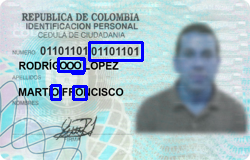

In [32]:
print("original format :")
Image.fromarray(original)

Tampered format :


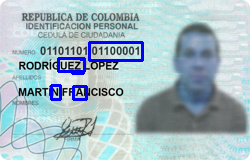

In [33]:
print("Tampered format :")
Image.fromarray(tampered)

### Display difference

Different image: 


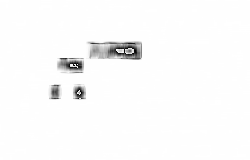

In [34]:
print('Different image: ')
Image.fromarray(diff)

### Display Threshold image  with white 


Threshold Image: 


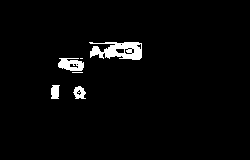

In [35]:
print('Threshold Image: ')
Image.fromarray(thresh)